
**MO432A - Aprendizado supervisionado**

**Equipe:**

*   Maria Fernanda Tejada Begazo - RA 197488
*   Jose Italo da Costa Silva - RA 265682
*   Gian Franco Joel Condori Luna - RA 234826

**Tarefa 03**

A tarefa foi desenvolvida na linguagem python. Para isso utilizou-se notebooks jupyter no ambiente Google Colaboratory (Google Colab).


In [ ]:
#Primeiro faz-se os imports necessários:
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import io

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #Accuracy pra valores continuos


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ler os dados

Os dados correspondente da base de dados "ouro2.csv". 

In [ ]:
dataFile = "/content/drive/My Drive/Supervised Learning/ouro2.csv"
df = pd.read_csv(dataFile, sep=',') 
df = df[::-1]
date = df['Data'].to_numpy()
df = df.drop(['Data'], axis=1) #Eliminar a coluna Data
pd.concat([df.head(), df.tail()])


,Valor
1095,282.7
1094,290.1
1093,283.2
1092,281.1
1091,280.1
4,1878.9
3,1905.3
2,1892.0
1,1879.6
0,1868.0


## Separe o conjunto de medida

In [ ]:
#df = df.drop(['Data'], axis=1) #Eliminar a coluna Data
data = df.to_numpy()
scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(data)

Xtest = data_norm[len(data_norm)-100:]
Xtrain = data_norm[:len(data_norm)-100]

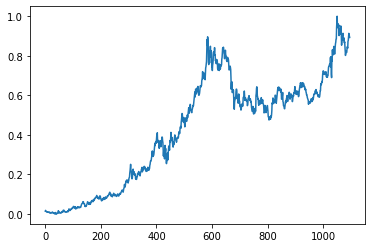

In [ ]:
plt.plot(data_norm)
plt.show()

In [ ]:
!pip install deap

     |████████████████████████████████| 163kB 6.4MB/s 


In [ ]:
import random
import operator

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp


def if_then_else(input, output1, output2):
    return output1 if input else output2

pset = gp.PrimitiveSetTyped("main", [bool, float], float)
pset.addPrimitive(operator.xor, [bool, bool], bool)
pset.addPrimitive(operator.mul, [float, float], float)
pset.addPrimitive(if_then_else, [bool, float, float], float)
pset.addTerminal(3.0, float)
pset.addTerminal(1, bool)

pset.renameArguments(ARG0="x")
pset.renameArguments(ARG1="y")

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.renameArguments(ARG0='x')

creator.create("Individual", gp.PrimitiveTree)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

expr = toolbox.individual()
nodes, edges, labels = gp.graph(expr)

print(nodes, edges)
print(labels)


expr = gp.genFull(pset, min_=1, max_=3)
tree = gp.PrimitiveTree(expr)
nodes, edges, labels = gp.graph(expr)
print(edges)
print(labels)
str(tree)

[0, 1, 2, 3, 4, 5, 6] [(0, 1), (1, 2), (1, 3), (0, 4), (4, 5), (4, 6)]
{0: 'sub', 1: 'add', 2: 'x', 3: 'x', 4: 'mul', 5: 'x', 6: 'x'}
[(0, 1), (0, 2)]
{0: 'sub', 1: 'x', 2: 'x'}


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


'sub(x, x)'

In [ ]:
(x*x) + (x+x)

# Sliding Windows



In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


18.040033717417476 0.8768971219891059
Best score:  18.040033717417476
17.849381665498065 0.8805365241024499
Best score:  17.849381665498065
17.805519366198965 0.8823403675576902
Best score:  17.805519366198965
18.02444016408755 0.8855395855212879
18.257248699030512 0.888876231435512
18.05218862973038 0.8958215040628632
19.240413692668884 0.8756847577137932
18.560738813253845 0.8749523738645313


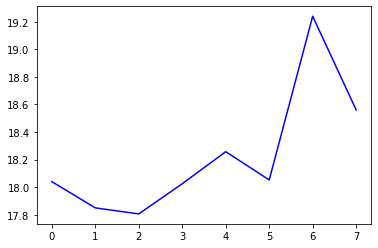

In [ ]:
XtestCV =  Xtrain[len(Xtrain)-100:]
XtrainCV = Xtrain[:len(Xtrain)-100]

#Hiperparameters
lb = [1, 4, 5, 10, 15, 20, 25, 30]
bestlb = 0
RMSE = 9999
RMSE_V = []
ACCURACY_V = []
modelo_est = LinearRegression()

for lb_ in lb:
  look_back = lb_
  trainX, trainY = create_dataset(XtrainCV, look_back)
  testX, testY = create_dataset(XtestCV, look_back)
  model = modelo_est.fit(trainX, trainY)
  
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
        
  trainPredict= [[i] for i in trainPredict]
  testPredict = [[i] for i in testPredict]  
        
  # invert predictions
  testPredict_ = scaler.inverse_transform(testPredict)
  testY_ = scaler.inverse_transform([testY])
        
  testScore = math.sqrt(mean_squared_error(testY_[0], testPredict_[:,0]))
  trainAccuracy = r2_score(testY_[0], testPredict_[:,0])
  RMSE_V.append(testScore)
  ACCURACY_V.append(trainAccuracy)
  print(testScore, trainAccuracy)
  if RMSE > testScore:
    print("Best score: ", testScore)
    RMSE = testScore
    bestlb = lb_

plt.plot(RMSE_V, color='b')
#plt.plot(testPredict_[:,0], color='r', label='Prediction')

lb:  5
Train Score: 25.08 RMSE
Train Score: 1.00 ACCURACY
Test Score: 44.94 RMSE
Test Score: 0.91 ACCURACY


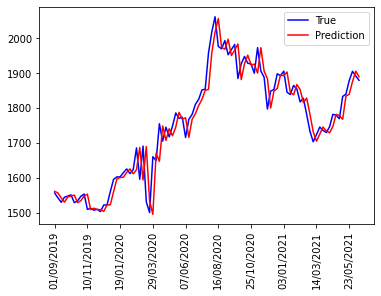

In [ ]:
look_back = bestlb
trainX, trainY = create_dataset(Xtrain, look_back)
testX, testY = create_dataset(Xtest, look_back)

modelo_est = LinearRegression()
model = modelo_est.fit(trainX, trainY)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict= [[i] for i in trainPredict]
testPredict = [[i] for i in testPredict]

# invert predictions
trainPredict_ = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
testPredict_ = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])

# calculate root mean squared error
print("lb: ", look_back)
trainScore = math.sqrt(mean_squared_error(trainY_[0], trainPredict_[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
trainAccuracy = r2_score(trainY_[0], trainPredict_[:,0])
print('Train Score: %.2f ACCURACY' % (trainAccuracy))
testScore = math.sqrt(mean_squared_error(testY_[0], testPredict_[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testAccuracy = r2_score(testY_[0], testPredict_[:,0])
print('Test Score: %.2f ACCURACY' % (testAccuracy))

date1 = date[len(date)-len(testY_[0]):]
len(date1)
date1 = date1[0::10]
len(date1)

plt.plot(testY_[0], color='b', label='True')
plt.plot(testPredict_[:,0], color='r', label='Prediction')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], date1, rotation='vertical')
plt.legend()

In [ ]:
date1 = date[len(date)-len(testY_[0]):]
len(date1)
date1 = date1[0::20]
len(date1)

5

# Long Short-Term Memory Network

In [ ]:

# fit an LSTM network to training data
def fit_lstm(X, Y, batchsize, nb_epoch, neurons, look_back):
	model = Sequential()
	model.add(LSTM(neurons, input_shape=(batchsize, look_back)))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	model.fit(X, Y, epochs=nb_epoch, batch_size=batchsize, verbose=0, shuffle=False)
	return model

look_back = 25
trainX, trainY = create_dataset(Xtrain, look_back)
testX, testY = create_dataset(Xtest, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

lstm_ = fit_lstm(trainX, trainY, 1, 100, 7, look_back)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict_ = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
testPredict_ = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_[0], trainPredict_[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_[0], testPredict_[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testAccuracy = r2_score(testY_[0], testPredict_[:,0])
print('Test Score: %.2f ACCURACY' % (testAccuracy))


Train Score: 60.69 RMSE
Test Score: 147.89 RMSE
Test Score: -0.55 ACCURACY


In [ ]:
# create and fit the LSTM network

# reshape into X=t and Y=t+1
XtestCV =  Xtrain[len(Xtrain)-100:]
XtrainCV = Xtrain[:len(Xtrain)-100]

#Hiperparameters
lb = [4, 5, 10, 15, 20, 25, 30]
neurons = [5, 7, 10, 12]
epochs_ = [50, 75, 100]

bestlb = 0
bestNeurons = 0
bestEpochs = 0
RMSE = 9999

for lb_ in lb:
  for nr_ in neurons:
    for ep in epochs_:
      look_back = lb_
      trainX, trainY = create_dataset(XtrainCV, look_back)
      testX, testY = create_dataset(XtestCV, look_back)

      trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
      testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

      model = Sequential()
      model.add(LSTM(nr_, input_shape=(1, look_back)))
      model.add(Dense(1))
      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(trainX, trainY, epochs=ep, batch_size=1, verbose=0)

      trainPredict = model.predict(trainX)
      testPredict = model.predict(testX)

      testScore = math.sqrt(mean_squared_error(testY_[0], testPredict_[:,0]))

      if RMSE > testScore:
        print("Best score: ", testScore)
        RMSE = testScore
        bestlb = lb_
        bestNeurons = nr_
        bestEpochs = ep

look_back = bestlb
trainX, trainY = create_dataset(Xtrain, look_back)
testX, testY = create_dataset(Xtest, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(bestNeurons, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=bestEpochs, batch_size=1, verbose=0)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# invert predictions
trainPredict_ = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
testPredict_ = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_[0], trainPredict_[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_[0], testPredict_[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
testAccuracy = r2_score(testY_[0], testPredict_[:,0])
print('Test Score: %.2f ACCURACY' % (testAccuracy))


Best score:  97.60450974637078


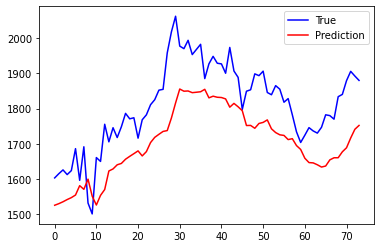

In [ ]:
plt.plot(testY_[0], color='b', label='True')
plt.plot(testPredict_[:,0], color='r', label='Prediction')
plt.legend()